# Signal-to-noise ratio calculation

Signal

$$ \mu_{knf} =  \sum_{ij} I_{nfij} \mathcal{N}(i, j \mid x_{knf}, y_{knf}, w_{knf}) $$

Noise

$$ \sigma^2_{knf} = \sigma^2_{\text{offset}} + \mu_{knf} \text{gain} $$

Signal-to-noise ratio

$$ \text{SNR}_{knf} = \dfrac{\mu_{knf} - b_{nf} - \mu_{\text{offset}}}{\sigma_{knf}} \text{ for } \theta_{nf} = k $$

In [1]:
import torch
import pyro
import pyro.distributions as dist
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [14]:
D = 14
background = 150
gain = torch.tensor(7.)

rv = dist.MultivariateNormal(
    torch.tensor([6.5, 6.5]),
    scale_tril=torch.eye(2) * torch.tensor([1.4])[..., None, None])

D_range = torch.arange(D, dtype=torch.float)
i_pixel, j_pixel = torch.meshgrid(D_range, D_range)
ij_pixel = torch.stack((i_pixel, j_pixel), dim=-1)

In [26]:
# calculate signal-to-noise ratio
heights = ["0300", "0500", "0750", "1000", "1500", "2000", "3000"]
snr = []
for h in heights:
    spot = rv.log_prob(ij_pixel).exp() * float(h)
    signal = (spot * rv.log_prob(ij_pixel).exp()).sum()
    noise = ((signal+background+89.5) * gain).sqrt()
    snr.append(float(signal / noise))

In [27]:
snr

[0.2901895344257355,
 0.47603097558021545,
 0.7004936933517456,
 0.9169125556945801,
 1.3280839920043945,
 1.7138175964355469,
 2.421982526779175]

In [25]:
model.data.labels

array([[( 0,   0,  True), ( 0,   1, False), ( 0,   2, False), ...,
        ( 0, 497, False), ( 0, 498, False), ( 0, 499, False)],
       [( 1,   0, False), ( 1,   1,  True), ( 1,   2, False), ...,
        ( 1, 497,  True), ( 1, 498, False), ( 1, 499, False)],
       [( 2,   0, False), ( 2,   1, False), ( 2,   2, False), ...,
        ( 2, 497,  True), ( 2, 498, False), ( 2, 499, False)],
       ...,
       [(12,   0, False), (12,   1,  True), (12,   2,  True), ...,
        (12, 497, False), (12, 498, False), (12, 499, False)],
       [(13,   0, False), (13,   1, False), (13,   2, False), ...,
        (13, 497, False), (13, 498, False), (13, 499, False)],
       [(14,   0,  True), (14,   1, False), (14,   2, False), ...,
        (14, 497, False), (14, 498, False), (14, 499,  True)]],
      dtype=[('aoi', '<i8'), ('frame', '<i8'), ('z', '?')])

Tracker v1.1.3flat

In [2]:
from cosmos.models import Tracker

In [19]:
name = "h2000pi15lamda15"
path_data = "/shared/centaur/data/height_data/{}".format(name)
path_params = "/shared/centaur/data/height_data/{}/runs/tracker/v1.1.3flat/S1/control/lr0.005/bs5".format(name)

In [20]:
model = Tracker(S=1)
model.load(path_data, False, "cpu")
model.load_parameters(path_params)

In [21]:
snr = model.snr()

In [22]:
snr.mean()

tensor(1.7269)

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

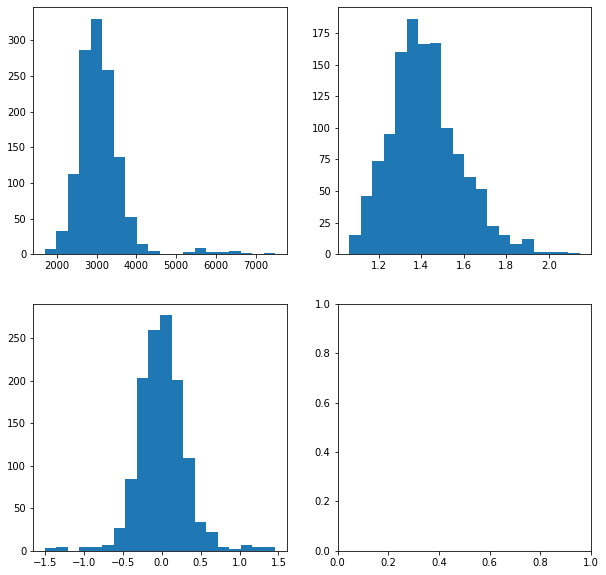

In [27]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.hist(height.numpy(), bins=20)

plt.subplot(222)
plt.hist(width.numpy(), bins=20)

plt.subplot(223)
plt.hist(x.numpy(), bins=20)

plt.subplot(224)
plt.hist(snr.numpy(), bins=20)
plt.show()

In [ ]:
snr.mean()